In [1]:
# read the data pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# hide df concat/append warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Part 1.
- load the data
- Familiarize the dataset

In [2]:
# read the data
data = pd.read_csv('hotels.csv')
df = data.copy()
df.head()

,hotel_address,review_date,hotel_name,negative_review,positive_review,reviewer_score,tags,days_since_review,reviewer_nationality,total_number_of_reviews_reviewer_has_given,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Russia,7,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Ireland,7,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Australia,9,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,United Kingdom,1,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,New Zealand,3,52.360576,4.915968


In [3]:
df.shape

(515738, 12)

In [4]:
# check nulls
df.isnull().sum()

hotel_address                                    0
review_date                                      0
hotel_name                                       0
negative_review                                  0
positive_review                                  0
reviewer_score                                   0
tags                                             0
days_since_review                                0
reviewer_nationality                             0
total_number_of_reviews_reviewer_has_given       0
lat                                           3268
lng                                           3268
dtype: int64

In [5]:
df.columns 

Index(['hotel_address', 'review_date', 'hotel_name', 'negative_review',
       'positive_review', 'reviewer_score', 'tags', 'days_since_review',
       'reviewer_nationality', 'total_number_of_reviews_reviewer_has_given',
       'lat', 'lng'],
      dtype='object')

In [6]:
df.dtypes

hotel_address                                  object
review_date                                    object
hotel_name                                     object
negative_review                                object
positive_review                                object
reviewer_score                                float64
tags                                           object
days_since_review                              object
reviewer_nationality                           object
total_number_of_reviews_reviewer_has_given      int64
lat                                           float64
lng                                           float64
dtype: object

# 2.
- Prepare the following plots
- top 10 hotels by the number of reviews they've recieved
- the ten least reliable hotels measured using interquartile range of review score

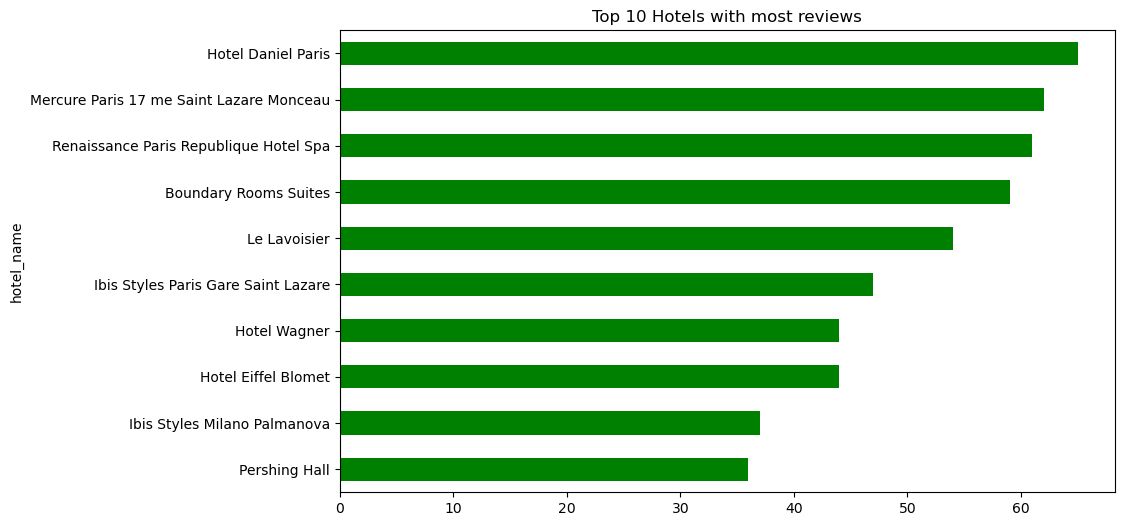

In [7]:
# group hotels and number of reviews
top_10_most_reviews = df.groupby('hotel_name')['total_number_of_reviews_reviewer_has_given'].sum().sort_values(ascending=True).head(10)

# show in chart with barh and y axis flipped label bars with values
top_10_most_reviews.plot(kind='barh', figsize=(10, 6), color='green', rot=0, title = 'Top 10 Hotels with most reviews')
plt.show()

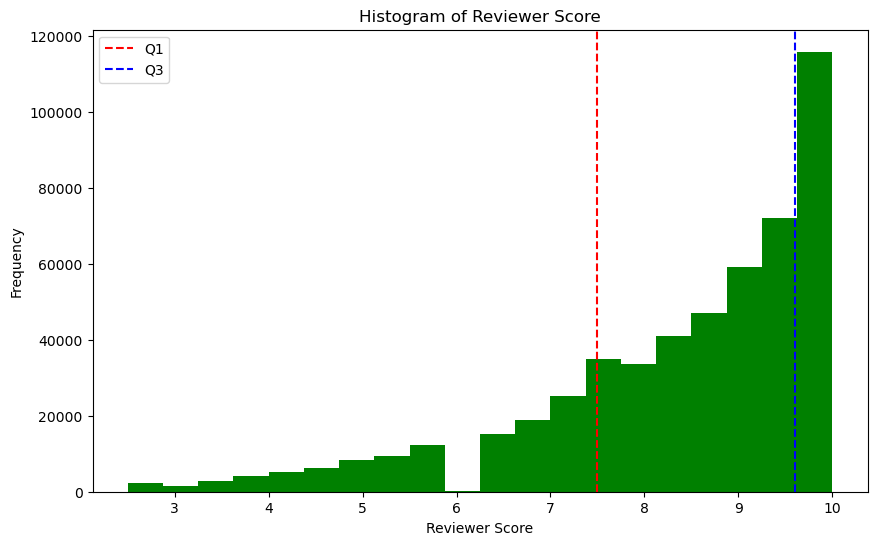

In [8]:
import matplotlib.pyplot as plt

# calculate quartiles
Q1 = df['reviewer_score'].quantile(0.25)
Q3 = df['reviewer_score'].quantile(0.75)

# plot histogram with quartile plots
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['reviewer_score'], bins=20, color='green')
ax.axvline(Q1, color='red', linestyle='--', label='Q1')
ax.axvline(Q3, color='blue', linestyle='--', label='Q3')
ax.set_xlabel('Reviewer Score')
ax.set_ylabel('Frequency')
ax.legend()
ax.set_title('Histogram of Reviewer Score')
plt.show()


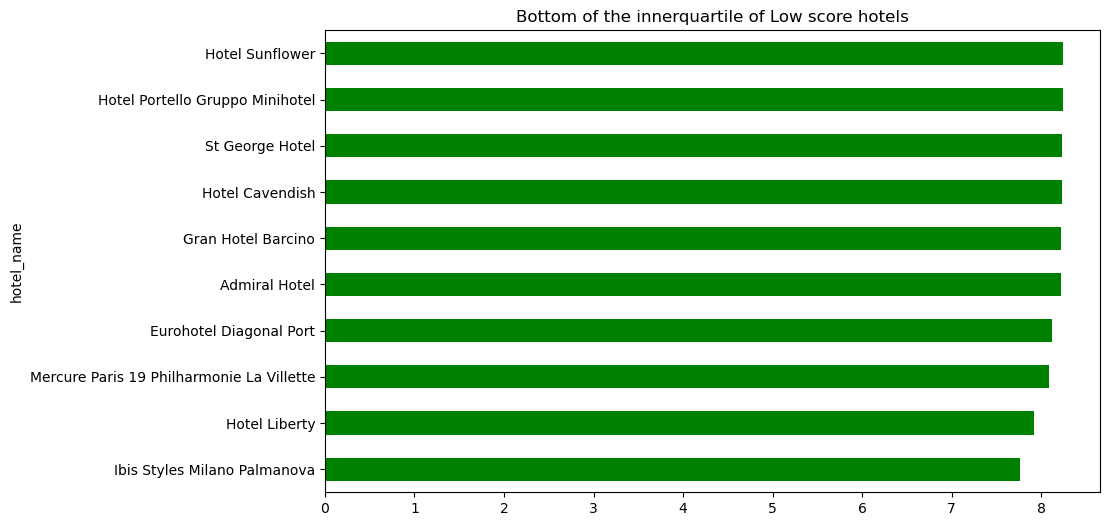

In [9]:
import matplotlib.pyplot as plt

# create a new DataFrame with the filtered rows
filtered_df = df[(df['reviewer_score'] >= Q1) & (df['reviewer_score'] <= Q3)]

# group by hotel name and calculate mean score
grouped_df = filtered_df.groupby('hotel_name')['reviewer_score'].mean().sort_values().head(10)

# show in chart with barh and y axis flipped label bars with values
grouped_df.plot(kind='barh', figsize=(10, 6), color='green', rot=0, title = 'Bottom of the innerquartile of Low score hotels')
plt.show()


# 3. 
- create a column called positive review wc with the number of words included in the comments of the positive review column 

In [10]:
# remove stop words
import nltk
from nltk.corpus import stopwords   
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# create a list of stopwords to be excluded
stop_words = stopwords.words('english')

# add several words to the list
stop_words.extend(['The', 'I', 'Very'])

# create a new column with the filtered stop words
df['positive_review_wc'] = df['positive_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# create a new column with the word count
df['positive_review_wc'] = df['positive_review_wc'].apply(lambda x: len(x.split()))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jrpak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 4.
- prepare a scatter plot comparing positive review wc and reveiwer score 
- comment on their relation ship
- explain your observation


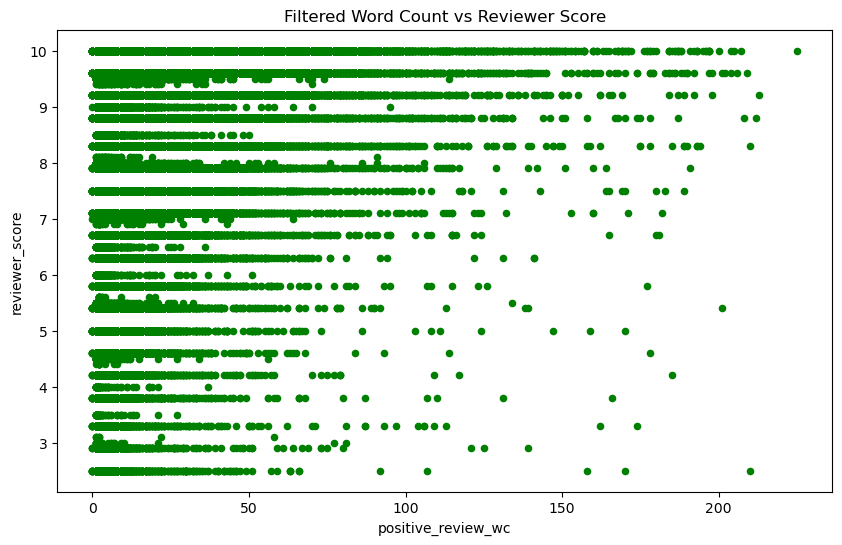

In [11]:
# prepare scatter plot filtered_words_wc and reviewer_score
df.plot(kind='scatter', x='positive_review_wc', y='reviewer_score', figsize=(10, 6), color='green', title = 'Filtered Word Count vs Reviewer Score')
plt.show()

- Scatter plot observation
- The higher the review score, the higher the word count.
- people have more to say about higher scoring hotels, according to the higher density of the chart in the higher ranges.  

# 5.
- obtain the ten most frequent words from the positive reviews column 
- consider removing stop words before counting

In [12]:
# obtain the most frequent words in the positive reviews
from nltk.stem import PorterStemmer

# NLP preprocesses
stemmer = PorterStemmer()

# convert the positive reviews to lowercase
df['positive_review'] = df['positive_review'].str.lower()

# create a list of words from the positive reviews
positive_review_words = df['positive_review'].str.split(expand=True).unstack().value_counts()

# remove stopwords from the list
positive_review_words = positive_review_words.drop(stop_words, errors='ignore')

# remove words with less than 3 characters reset index 1 - 10
positive_review_words = positive_review_words[positive_review_words.index.str.len() > 2].to_frame().reset_index()
    

In [13]:
# Display the top 10 most frequent words table
positive_review_words.columns = ['word', 'count']
print('before stemming')
display(positive_review_words.head(10))
# stem words
positive_review_words['word'] = positive_review_words['word'].apply(lambda x: stemmer.stem(x))
# group by word and sum the counts 
positive_review_words = positive_review_words.groupby('word')['count'].sum().sort_values(ascending=False).to_frame().reset_index()
print('after stemming')
display(positive_review_words.head(10))

before stemming


,word,count
0,staff,194574
1,location,192856
2,room,140746
3,hotel,125326
4,good,112321
5,great,105641
6,friendly,85353
7,breakfast,84581
8,helpful,76183
9,nice,69449


after stemming


,word,count
0,locat,201661
1,staff,196639
2,room,181125
3,hotel,130173
4,good,112406
5,great,105708
6,friendli,87289
7,breakfast,86383
8,help,85234
9,nice,71887


# Part 2 
- option 1
- fit a classification model on the data provided to predict whethter the review score is greater than 9
- state assumptions you make in model and why 
- consider engineering extra features to assist

In [14]:
df.columns

Index(['hotel_address', 'review_date', 'hotel_name', 'negative_review',
       'positive_review', 'reviewer_score', 'tags', 'days_since_review',
       'reviewer_nationality', 'total_number_of_reviews_reviewer_has_given',
       'lat', 'lng', 'positive_review_wc'],
      dtype='object')

In [15]:
# import LabelEncoder and save csv file
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
le = LabelEncoder()

# drop columns
new_dataset = df.drop(['hotel_name', 'negative_review','tags', 'lng', 'lat'], axis=1)

# list of categorical columns
objlist = new_dataset.select_dtypes(include='object').columns.tolist()

# apply LabelEncoder to categorical columns
for feat in objlist:
    new_dataset[feat] = le.fit_transform(new_dataset[feat].astype(str))

# check dtypes if numeric values are true
if new_dataset.dtypes.all() == True:
    print('all dtypes are numeric')
    new_dataset.to_csv('Data_X.csv', index=False) # save csv file



all dtypes are numeric


- Hotel name and hotel address have the same values in diiferent words so one is removed, extra data in this case is unnecessary for machine predictions
- Although the latitude might relate to higher review scores it is removed for excessive null values, also trained with and without lng and lat column while removing nulls but no significant improvement


# Train 1
- Test basic models
- Random Forest and XGboost are highest scoring models
- Loggistic regression is certainly fast 
- The other models are commented out to save rerun time

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X = new_dataset.drop(['reviewer_score'], axis=1)
y = new_dataset['reviewer_score']

# round IF Y IIS GREATER THAN 9 ITS TRUE
y = y.apply(lambda x: 1 if x >= 9 else 0)

In [17]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

acc = []
prec = []
rec = []
f1 = []
model = []

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# initialize logistic regression model
logreg = LogisticRegression()

# fit model on training data
logreg.fit(X_train, y_train)

# make predictions on test data
y_pred = logreg.predict(X_test)

# evaluate model performance using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
acc.append(accuracy)
prec.append(precision_score(y_test, y_pred))
rec.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
model.append('Logistic Regression')

Accuracy: 0.5756065717868176
Confusion Matrix:
 [[65416 15301]
 [50362 23643]]


In [19]:
# from sklearn.tree import DecisionTreeClassifier

# # Create a decision tree classifier
# clf = DecisionTreeClassifier()

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = clf.predict(X_test)

# # evaluate model performance using accuracy and confusion matrix
# accuracy = accuracy_score(y_test, y_pred)
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_mat)
# acc.append(accuracy)
# prec.append(precision_score(y_test, y_pred))
# rec.append(recall_score(y_test, y_pred))
# f1.append(f1_score(y_test, y_pred))
# model.append('Decision Tree')


In [20]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest classifier
# clf = RandomForestClassifier()

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)
# # Make predictions on the test data
# y_pred = clf.predict(X_test)

# # evaluate model performance using accuracy and confusion matrix
# accuracy = accuracy_score(y_test, y_pred)
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_mat)
# acc.append(accuracy)
# prec.append(precision_score(y_test, y_pred))
# rec.append(recall_score(y_test, y_pred))
# f1.append(f1_score(y_test, y_pred))
# model.append('Random Forest')


In [21]:
# # classifying using KNN
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load data and split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# # Create a KNN classifier
# clf = KNeighborsClassifier()

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = clf.predict(X_test)

# # evaluate model performance using accuracy and confusion matrix
# accuracy = accuracy_score(y_test, y_pred)
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_mat)
# acc.append(accuracy)
# prec.append(precision_score(y_test, y_pred))
# rec.append(recall_score(y_test, y_pred))
# f1.append(f1_score(y_test, y_pred))
# model.append('KNN')


In [22]:
# # plot line chart for metrics
# import matplotlib.pyplot as plt
# import seaborn as sns

# # plot a line chart containing accuracy, precision, recall and f1 score
# plt.figure(figsize=(10, 5))
# plt.plot(model, acc, label='Accuracy')
# plt.plot(model, prec, label='Precision')
# plt.plot(model, rec, label='Recall')
# plt.plot(model, f1, label='F1 Score')
# plt.legend()



# Model Train 2 

### Extract more features from the reviews

- I vectorized the tags to add sentiment of the accomadation types, "barely any difference from the accuracy score, 0.05 small improvement and feature importance shows insignificant value to the output"
- From the positive reviews I try Sentiment scoring "including the vectorized tags around a 0.2 small improvement"
- Then try parameter tuning using grid search for random forest
- then try XGboost test
- Analyze feature importance

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# convert the tags column to lowercase and remove spaces, brackets, and quotes
df['tags'] = df['tags'].astype(str).str.lower().str.replace(' ', '').str.replace('[', '').str.replace(']', '').str.replace("'", '')

# create a CountVectorizer object
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

# fit the vectorizer to the tags column
vectorizer.fit(df['tags'])

# transform the tags column
tags = vectorizer.transform(df['tags'])

# get the feature names (unique tags)
feature_names = vectorizer.get_feature_names_out()

# create a dataframe from the CountVectorizer output
tags_df = pd.DataFrame(tags.toarray(), columns=feature_names)

print('count vectorizer output will be concatenated to the original dataframe X')
# print the dataframe
tags_df.head()

count vectorizer output will be concatenated to the original dataframe X


,1kingbedguestroom,2adjacentnoncommunicatingrooms,2adjacentrooms,2adjacentsuperiorrooms,2connectingdeluxeroomswithvipserviceforkids,2connectingdoublerooms,2connectingrooms,2connectingrooms4adults,2connectingrooms4people,2connectingrooms5adults,...,withapet,wonderfulbankking,wonderfulbankwithcanalview,wonderfuldoubleortwinroom,wonderfuldoubleroom,wonderfulexchangeking,wonderfulroom,wonderfulskyroom,xordinaryroom,xscapeking
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


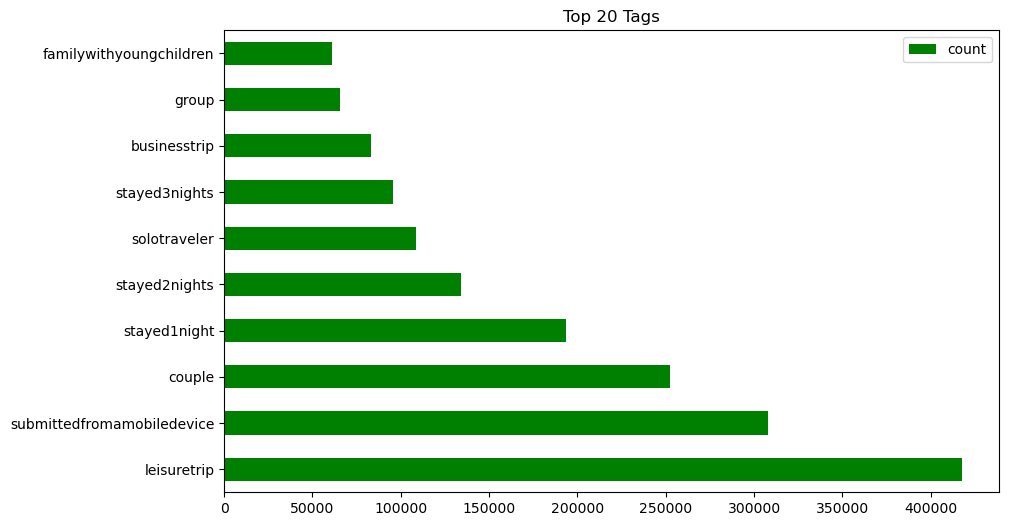

In [24]:
# create a dataframe with the sum of each tag
count = pd.DataFrame(tags_df.sum(), columns=['count'])

# sort the dataframe by count
count = count.sort_values(by='count', ascending=False)

# plot the top 20 tags
count.head(10).plot(kind='barh', figsize=(10, 6), color='green', title = 'Top 20 Tags')
plt.show()


In [25]:
#  filter columns tags_df with values in count index head 30
tags_df = tags_df[count.head(10).index[:]]

# concatenate tags_df to the original dataframe
df = pd.concat([df, tags_df], axis=1)
df.head()

,hotel_address,review_date,hotel_name,negative_review,positive_review,reviewer_score,tags,days_since_review,reviewer_nationality,total_number_of_reviews_reviewer_has_given,...,leisuretrip,submittedfromamobiledevice,couple,stayed1night,stayed2nights,solotraveler,stayed3nights,businesstrip,group,familywithyoungchildren
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,I am so angry that i made this post available...,only the park outside of the hotel was beauti...,2.9,"leisuretrip,couple,duplexdoubleroom,stayed6nights",0 days,Russia,7,...,1,0,1,0,0,0,0,0,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,No Negative,no real complaints the hotel was great great ...,7.5,"leisuretrip,couple,duplexdoubleroom,stayed4nights",0 days,Ireland,7,...,1,0,1,0,0,0,0,0,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Rooms are nice but for elderly a bit difficul...,location was good and staff were ok it is cut...,7.1,"leisuretrip,familywithyoungchildren,duplexdoub...",3 days,Australia,9,...,1,1,0,0,0,0,1,0,0,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,My room was dirty and I was afraid to walk ba...,great location in nice surroundings the bar a...,3.8,"leisuretrip,solotraveler,duplexdoubleroom,stay...",3 days,United Kingdom,1,...,1,0,0,0,0,1,1,0,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,You When I booked with your company on line y...,amazing location and building romantic setting,6.7,"leisuretrip,couple,suite,stayed2nights,submitt...",10 days,New Zealand,3,...,1,1,1,0,1,0,0,0,0,0


In [26]:
X = df.drop(['reviewer_score','hotel_name','negative_review','lng','lat'], axis=1)
y = df['reviewer_score']

# round IF Y IIS GREATER THAN 9 ITS TRUE
y = y.apply(lambda x: 1 if x >= 9 else 0)

In [27]:
# list of categorical columns
objlist = X.select_dtypes(include='object').columns.tolist()

# apply LabelEncoder to categorical columns
for feat in objlist:
    X[feat] = le.fit_transform(df[feat].astype(str))

# check dtypes if numeric values are true
if X.dtypes.all() == True:
    print('all dtypes are numeric')
    # df.to_csv('Data_X.csv', index=False) # save csv file
else:
    print('not all dtypes are numeric')
    print('please check the dtypes of the following columns:')
    print(X.dtypes[X.dtypes != 'int64'])

all dtypes are numeric


- Sentiment scoring

In [28]:
from textblob import TextBlob

# create a function to get sentiment score
def get_sentiment_score(sentence):
    blob = TextBlob(sentence)
    return blob.sentiment.polarity

# apply the function to the positive_review column and add score to a new column
df['sentiment_score'] = df['positive_review'].apply(get_sentiment_score)

Commented cause its process heavy 

In [29]:
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.ldamodel import LdaModel
# # create a list of lists containing words for each review
# texts = [[text for text in doc.split()] for doc in df['positive_review']]

# # remove stopwords
# texts = [[word for word in doc if word not in stop_words] for doc in texts]

# #stemming
# texts = [[stemmer.stem(word) for word in doc] for doc in texts]

# # get list of adj remove adj    
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# adj = list(set([word for doc in df['positive_review'] for word, pos in TextBlob(doc).tags if pos == 'JJ']))
# texts = [[word for word in doc if word not in adj] for doc in texts]

# # create dictionary
# dictionary = Dictionary(texts)

# # remove words that appear less than 10 times and words that appear in more than 50% of the documents
# dictionary.filter_extremes(no_below=10, no_above=0.5)

# # create corpus
# corpus = [dictionary.doc2bow(text) for text in texts]

# # create lda model
# lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# # print topics
# lda_model.print_topics()

# # create a function to get the topic for each review
# def get_topic(review):
#     bow = dictionary.doc2bow(review.split())
#     return sorted(lda_model.get_document_topics(bow), key=lambda x: x[1], reverse=True)[0][0]

# # apply the function to the positive_review column and add topic to a new column
# df['topic'] = df['positive_review'].apply(get_topic)

In [30]:
# # print topics
# lda_model.print_topics()

In [31]:
# # show reviews and topics
# df[['positive_review', 'topic']].head(10)


# Random forest optimization
- Split and train best model

In [32]:
X = df.drop(['reviewer_score','hotel_name','negative_review','lng','lat', 'positive_review'], axis=1)

# list of categorical columns
objlist = X.select_dtypes(include='object').columns.tolist()

# apply LabelEncoder to categorical columns
for feat in objlist:
    X[feat] = le.fit_transform(df[feat].astype(str))

# check dtypes if numeric values are true
if X.dtypes.all() == True:
    print('all dtypes are numeric')
    # df.to_csv('Data_X.csv', index=False) # save csv file
else:
    print('not all dtypes are numeric')
    print('please check the dtypes of the following columns:')
    print(X.dtypes[X.dtypes != 'int64'])
    
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


all dtypes are numeric


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
    

# Create a random forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate model performance using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.6298781039541888
Precision: 0.6168934981163027
Recall: 0.5989903216662392
F1 Score: 0.6078101030024108
Confusion Matrix:
 [[53081 27558]
 [29708 44375]]


In [34]:
X

,hotel_address,review_date,tags,days_since_review,reviewer_nationality,total_number_of_reviews_reviewer_has_given,positive_review_wc,leisuretrip,submittedfromamobiledevice,couple,stayed1night,stayed2nights,solotraveler,stayed3nights,businesstrip,group,familywithyoungchildren,sentiment_score
0,0,614,20005,0,167,7,5,1,0,1,0,0,0,0,0,0,0,0.283333
1,0,614,20001,0,98,7,64,1,0,1,0,0,0,0,0,0,0,0.241960
2,0,608,35009,223,14,9,13,1,1,0,0,0,0,1,0,0,1,0.460000
3,0,608,48761,223,214,1,14,1,0,0,0,0,1,1,0,0,0,0.625000
4,0,594,25263,2,146,3,5,1,1,1,0,1,0,0,0,0,0,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,1492,667,27663,673,111,8,1,1,0,0,0,0,0,0,0,0,0,0.000000
515734,1492,651,38396,682,66,12,5,1,0,0,0,1,0,0,0,0,1,0.250000
515735,1492,645,27662,685,62,3,2,1,1,0,0,0,0,0,0,0,0,-0.113636
515736,1492,641,45091,687,133,3,11,1,0,0,0,0,0,1,0,1,0,0.300000


commented out cause the proccessing is heavy

In [35]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print("Best hyperparameters:", grid_search.best_params_) 
print("Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}")

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [36]:
best_rfc = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=4, random_state=42)
best_rfc.fit(X_train, y_train)
score = best_rfc.score(X_test, y_test)
print("Accuracy:", score)


Accuracy: 0.6409043316399736


# XGboost with and without parameter tuning

In [37]:
# xgboost
import xgboost as xgb

# Create a xgboost classifier
clf = xgb.XGBClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate model performance using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)
    

Accuracy: 0.6666020346169258
Precision: 0.6529316602998954
Recall: 0.6483133782379223
F1 Score: 0.6506143238373906
Confusion Matrix:
 [[55109 25530]
 [26054 48029]]


In [38]:
# # grid search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'min_child_weight': [1, 2, 4],
# }

# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print("Best hyperparameters:", grid_search.best_params_)
print("Best hyperparameters: {'learning_rate': 0.2, 'max_depth': None, 'min_child_weight': 4, 'n_estimators': 300}")

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': None, 'min_child_weight': 4, 'n_estimators': 300}


In [39]:
# best model
best_xgb = xgb.XGBClassifier(n_estimators=300, max_depth=None, learning_rate=0.1, min_child_weight=4, random_state=42)

best_xgb.fit(X_train, y_train)

score = best_xgb.score(X_test, y_test)
print("Accuracy:", score)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.6676426106177531
Precision: 0.6529316602998954
Recall: 0.6483133782379223
F1 Score: 0.6506143238373906


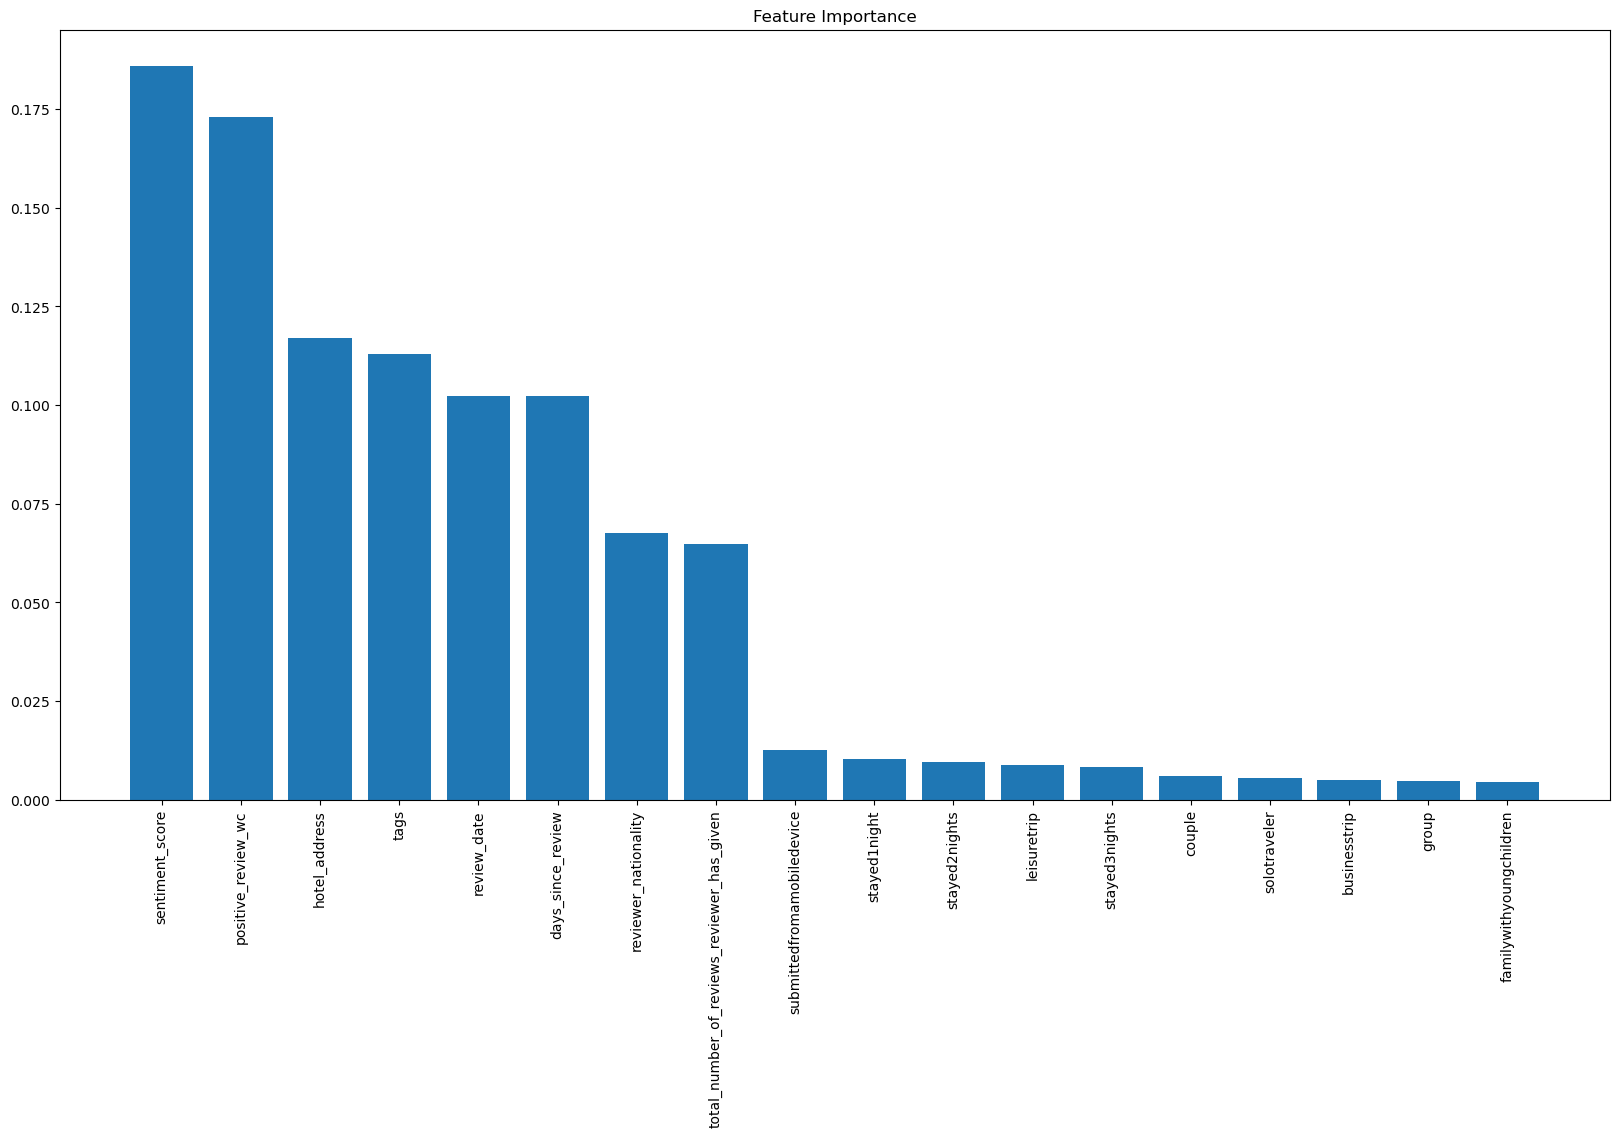

In [40]:
# random forest feature importance
importances = best_rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Conclusional statement
- The XGBOOST model performs the best
- Considering the feature importance graph review data has the strongest value towards accuracy
- also neglected negative reviews, I rekon negative reviews would'nt influence predicting the scores over 9
- Testing after the NLP data engineering was improved 